In [549]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import FunctionTransformer


from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [501]:
df =pd.read_csv('/Users/monikaju/Desktop/bike-sharing-demand/train.csv', parse_dates=True)

In [619]:
df.shape

(10886, 12)

In [621]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [503]:
df.shape

(10886, 12)

In [622]:
# Defining the explanatory variables

X = df.drop(['count','casual', 'registered'], axis=1)
y = df[['count']]

In [623]:
# Spliting the data

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state =10)

In [624]:
pd.to_datetime(X_train['datetime'])

9792   2012-10-12 09:00:00
3815   2011-09-09 23:00:00
2420   2011-06-08 18:00:00
4176   2011-10-06 01:00:00
4283   2011-10-10 12:00:00
               ...        
9372   2012-09-13 21:00:00
7291   2012-05-03 04:00:00
1344   2011-04-01 21:00:00
7293   2012-05-03 06:00:00
1289   2011-03-18 14:00:00
Name: datetime, Length: 8164, dtype: datetime64[ns]

## FEATURING ENGINEERING

In [700]:

def create_time_parts(df):
    df = df.copy()
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour
    df['month'] = pd.to_datetime(df['datetime']).dt.month
    df['weekday'] = pd.to_datetime(df['datetime']).dt.weekday
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    return df

In [701]:
#Adding time_parts to your train data

X_train1=create_time_parts(X_train)

In [702]:
X_train1.shape

(8164, 13)

In [703]:
X_train1.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,weekday,year
9792,2012-10-12 09:00:00,4,0,1,1,20.50,24.240,39,19.9995,9,10,4,2012
3815,2011-09-09 23:00:00,3,0,1,1,25.42,27.275,94,6.0032,23,9,4,2011
2420,2011-06-08 18:00:00,2,0,1,1,36.90,40.910,37,15.0013,18,6,2,2011


In [704]:
dummy_features = ['hour','month','weekday','year']
other_features = ['holiday']
interaction_features = ['workingday','weather']
polynomial_features = ['season','temp','humidity','windspeed']

In [705]:
column_transformer = ColumnTransformer(
    transformers=[('dummy', OneHotEncoder(), dummy_features),
                  ('pass', 'passthrough', other_features),
                  ('interaction_polynomial', PolynomialFeatures(degree=4), polynomial_features),
                  ('interaction_transformer',PolynomialFeatures(interaction_only=True, include_bias=False),interaction_features)
                 ])

In [706]:
transformer_pipeline = Pipeline(steps=[
                        ('column_transformer', column_transformer),
])

In [707]:
X_train2=transformer_pipeline.fit_transform(X_train1)

In [708]:
X_train2.shape

(8164, 119)

In [709]:
X_train2

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 2., 2.],
       [0., 0., 0., ..., 1., 1., 1.]])

## TRAIN THE MODEL

In [710]:
lm = LinearRegression().fit(X_train2, y_train)

In [711]:
lm.intercept_

array([-12463463.31929482])

In [712]:
lm.coef_

array([[ 1.24632342e+07,  1.24632175e+07,  1.24632097e+07,
         1.24631995e+07,  1.24631955e+07,  1.24632113e+07,
         1.24632690e+07,  1.24634081e+07,  1.24635490e+07,
         1.24633963e+07,  1.24633386e+07,  1.24633720e+07,
         1.24634115e+07,  1.24634054e+07,  1.24633861e+07,
         1.24633912e+07,  1.24634570e+07,  1.24636141e+07,
         1.24635830e+07,  1.24634743e+07,  1.24633941e+07,
         1.24633467e+07,  1.24633092e+07,  1.24632709e+07,
        -1.34714585e+01,  1.13280455e+01,  2.88485441e+01,
        -3.26922029e+01,  7.81195166e+00, -1.39253568e+01,
        -9.59390408e+00, -6.96869191e+00,  3.08083457e+01,
         3.43775717e+00, -4.88285207e+00, -7.00086174e-01,
        -8.08411880e+00,  4.85857632e-01,  3.18733408e+00,
         4.56888318e+00,  2.27466008e+00,  9.07584252e+00,
        -1.15084701e+01, -4.28045537e+01,  4.28045540e+01,
         9.29881496e+00,  1.08778477e-06, -1.67497066e+01,
        -1.89812868e+01,  1.06204813e+01, -1.22170048e+0

In [713]:
y_predict=lm.predict(X_train2)

In [714]:
y_predict.shape

(8164, 1)

In [715]:
# This give us the R^2
lm.score(X_train2, y_train)

0.7216409136558151

Text(0, 0.5, 'y_train')

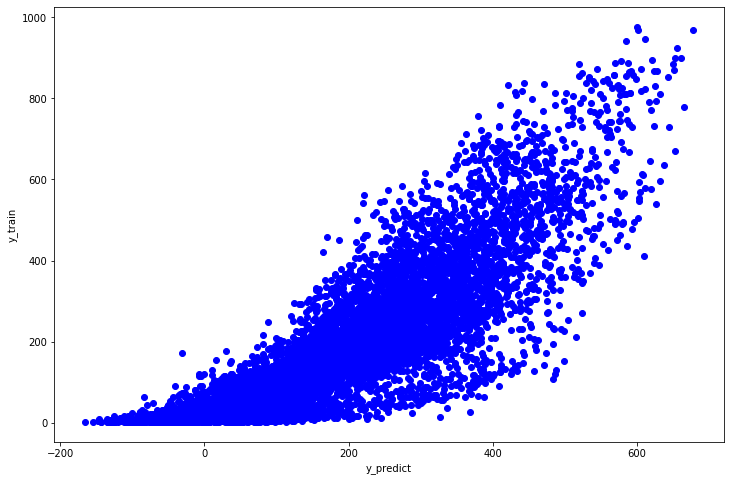

In [716]:
plt.figure(figsize=(12, 8))
plt.scatter(y_predict,y_train, color='b')
plt.xlabel("y_predict")
plt.ylabel("y_train")

In [717]:
def plot_results(y_predict, y_true, x):
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y_true,color = 'b', label ='train')
    plt.scatter(x, y_predict, color='r',label ='predict')
    plt.ylabel("checkout_bikes")
    plt.legend()
    plt.show()

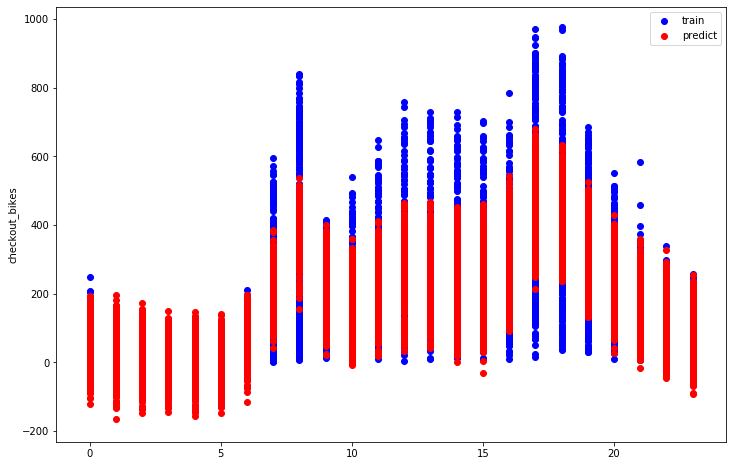

In [718]:
plot_results(y_predict, y_train, X_train1['hour'])

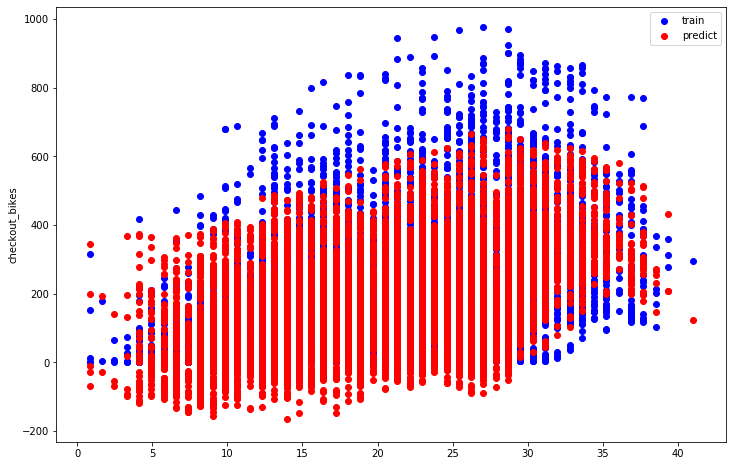

In [719]:
plot_results(y_predict, y_train, X_train1['temp'])

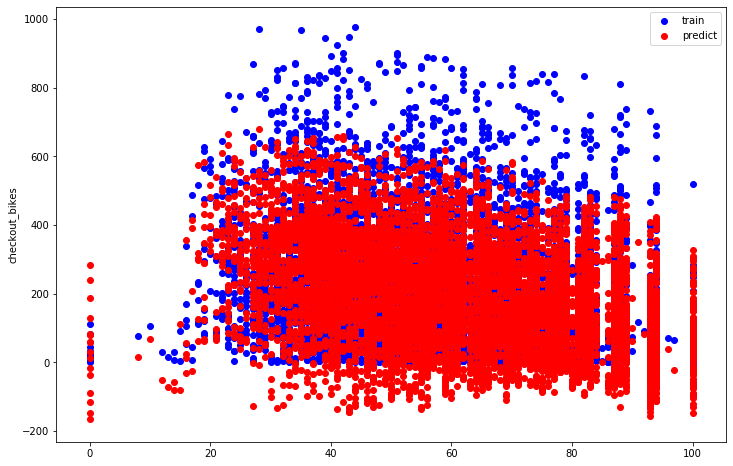

In [720]:
plot_results(y_predict, y_train, X_train1['humidity'])

## CROSS VALIDATION

In [721]:
## R^2(train data)+0.7216409136558151. No significant differences with the other crosss-validation scores. 

cross_val_score(lm, X_train2, y_train)


array([0.7089629 , 0.72814439, 0.69759062, 0.7020235 , 0.72134301])

## TESTING MODEL ON THE TEST DATA

In [722]:
X_test2=transformer_pipeline.fit_transform(X_test)

ValueError: A given column is not a column of the dataframe

In [723]:
lm = LinearRegression().fit(X_test2, y_test)

In [724]:
## R^2(train data)+0.7216409136558151. No significant differences with the score from the testing data. 


lm.score(X_test2, y_test)

0.7194135269287782

### REGULARIZATION

In [725]:
alpha = 2.0

In [726]:
m_ridge = Ridge(alpha=alpha)
m_ridge.fit(X_train2, y_train)

/Users/monikaju/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.24146e-19): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [727]:
m_ridge.score(X_train2, y_train) 

0.7216138417724788

In [728]:
m_lasso = Lasso(alpha=alpha)
m_lasso.fit(X_train2, y_train)

/Users/monikaju/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66802767.678641334, tolerance: 26342.5146216928
  positive)


Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [729]:
m_lasso.score(X_train2, y_train)

0.6435871039836651

In [730]:
m_elastic = ElasticNet(alpha=alpha, l1_ratio=1)
m_elastic.fit(X_train2, y_train)

/Users/monikaju/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66802767.678641334, tolerance: 26342.5146216928
  positive)


ElasticNet(alpha=2.0, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [731]:
m_elastic.score(X_train2, y_train)

0.6435871039836651